In [1]:
import torch

In [2]:
# 行列を作る

# (5, 3)のゼロ行列
x = torch.Tensor(5, 3)
print(x)

# 中身がランダムな(5, 3)行列
x = torch.rand(5, 3)
print(x)

# 行列のサイズを調べる
print(x.size())


-2.3593e-24  4.5558e-41 -2.3593e-24
 4.5558e-41  0.0000e+00  2.9427e-44
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00 -2.9022e+26  2.6955e+23
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]


 0.6070  0.0003  0.9843
 0.4240  0.5998  0.7377
 0.3297  0.0812  0.0664
 0.8298  0.1349  0.5677
 0.0182  0.3394  0.2584
[torch.FloatTensor of size 5x3]

torch.Size([5, 3])


In [3]:
# 行列演算をする
# 下記は全て加算の例

y = torch.rand(5, 3)

print(x + y)

print(torch.add(x, y))

result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)

y.add_(x)
print(y)


 1.4346  0.8857  1.2241
 1.0116  1.3135  1.1323
 1.0630  0.9790  0.4884
 0.8323  0.8571  0.9381
 0.3362  0.9806  0.7071
[torch.FloatTensor of size 5x3]


 1.4346  0.8857  1.2241
 1.0116  1.3135  1.1323
 1.0630  0.9790  0.4884
 0.8323  0.8571  0.9381
 0.3362  0.9806  0.7071
[torch.FloatTensor of size 5x3]


 1.4346  0.8857  1.2241
 1.0116  1.3135  1.1323
 1.0630  0.9790  0.4884
 0.8323  0.8571  0.9381
 0.3362  0.9806  0.7071
[torch.FloatTensor of size 5x3]


 1.4346  0.8857  1.2241
 1.0116  1.3135  1.1323
 1.0630  0.9790  0.4884
 0.8323  0.8571  0.9381
 0.3362  0.9806  0.7071
[torch.FloatTensor of size 5x3]



In [4]:
# 行列操作

# numpyのように行列要素を選択することもできる
print(x)
print(x[:, 1])

# view関数で操作することもできる
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x)
print(y)
print(z)
print(x.size(), y.size(), z.size())


 0.6070  0.0003  0.9843
 0.4240  0.5998  0.7377
 0.3297  0.0812  0.0664
 0.8298  0.1349  0.5677
 0.0182  0.3394  0.2584
[torch.FloatTensor of size 5x3]


 0.0003
 0.5998
 0.0812
 0.1349
 0.3394
[torch.FloatTensor of size 5]


 0.5047 -0.6150  2.0517  0.3111
-0.1924 -1.8970 -0.5967 -0.0342
-0.2990 -0.5391 -0.5829  0.4809
 1.0945  2.0308  1.2156  0.9228
[torch.FloatTensor of size 4x4]


 0.5047
-0.6150
 2.0517
 0.3111
-0.1924
-1.8970
-0.5967
-0.0342
-0.2990
-0.5391
-0.5829
 0.4809
 1.0945
 2.0308
 1.2156
 0.9228
[torch.FloatTensor of size 16]


 0.5047 -0.6150  2.0517  0.3111 -0.1924 -1.8970 -0.5967 -0.0342
-0.2990 -0.5391 -0.5829  0.4809  1.0945  2.0308  1.2156  0.9228
[torch.FloatTensor of size 2x8]

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [5]:
# 要素が1の配列を生成する

a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [6]:
# numpyの行列をtorchのtensorに変換する

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [7]:
# 微分のような複雑な計算もサポートしてるtensorのラッパー
from torch.autograd import Variable

In [8]:
# variableで行列を生成
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [9]:
# ブロードキャストした演算
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [10]:
# 演算によって生成した行列はgrad_fnをもつ
print(y.grad_fn)

In [11]:
# yをさらに演算する
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [12]:
# 最後しにした演算をbackward関数することでバックプロパゲートを開始する
# backward関数に引数を渡さなければbackward(torch.Tensor([1.0]))と同じ
out.backward()

In [13]:
# 例えばxの逆伝搬の値はこれ
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [14]:
# このような複雑な演算もできるよ
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
print(y)
# ベクトルのノルムが1000になるまでひたすら2をかけてみる
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
-0.5187
-2.0135
-2.3895
[torch.FloatTensor of size 3]

Variable containing:
 -265.5678
-1030.9374
-1223.4226
[torch.FloatTensor of size 3]



In [15]:
# このような複雑な演算もできるよ
# backward関数に引数を渡せば出力の変化分に対応する微分を求められるよ
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



In [16]:
# CNNの例
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 2次元入力をフィルターする畳み込み演算をおこなうコンボリューション層
        # 1 input image channel, 6 output channels, 5x5 square convolution
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # アフィン変換による線形演算層
        # an affine operation: y = Wx + b
        # W(16 * 5 * 5, 120), 16 * 5 * 5 input_features, 120 output_features
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [17]:
# CNNの最初のコンボリューション層の重みにアクセス
params = list(net.parameters())
# ニューラルネットが最後に吐き出すパラメーターのサイズ
print(len(params))
# 重みの行列
print(params[0])
# 重みの行列サイズ
print(params[0].size())  # conv1's .weight

10
Parameter containing:
(0 ,0 ,.,.) = 
  0.0199 -0.1982  0.0438 -0.1476  0.1197
  0.0520 -0.1908 -0.1153 -0.0674 -0.0086
  0.0432 -0.0997 -0.1729 -0.1023  0.0325
  0.0932  0.0614  0.1386 -0.0003  0.0187
  0.0247  0.0578 -0.1575 -0.1124  0.0195

(1 ,0 ,.,.) = 
  0.1101 -0.0930  0.1836 -0.1109  0.1920
  0.0717 -0.1691 -0.1748 -0.1562 -0.0567
 -0.0923 -0.1802  0.1656  0.0858 -0.1745
 -0.1854  0.0404 -0.1746 -0.0227 -0.0694
 -0.1082  0.0321  0.1728  0.1331  0.1387

(2 ,0 ,.,.) = 
 -0.1647  0.0326 -0.1632 -0.0462 -0.0135
 -0.1210  0.1022 -0.0362 -0.0090  0.1485
  0.1400  0.0676 -0.1529  0.0719 -0.0414
 -0.0002  0.0012 -0.1944 -0.1418 -0.0381
  0.0934 -0.1819  0.1250 -0.1092  0.0113

(3 ,0 ,.,.) = 
  0.1146  0.1534  0.0427 -0.0486  0.0205
  0.0996  0.0623  0.0499  0.0073 -0.0670
 -0.0759 -0.1242 -0.0460 -0.1079  0.1108
 -0.1734 -0.0385 -0.0967  0.1777  0.0956
 -0.1044 -0.0347  0.0612  0.1833 -0.0451

(4 ,0 ,.,.) = 
  0.1218 -0.0346 -0.1145 -0.0480 -0.0649
  0.0470  0.0635 -0.1526 -0.1823  0

In [18]:
# 試しにネットに32x32の画像データを流す
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
1.00000e-02 *
  3.0453  2.2074 -7.1399 -7.7145 -1.6841  0.0790  1.5687 -4.8606  3.0918 -8.8330
[torch.FloatTensor of size 1x10]



In [19]:
# 損失関数を使ってみる
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
print(target)
# 二乗和誤差をつかってみる
# ニューラルネットの出力と1..10連番を比較
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

Variable containing:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
[torch.FloatTensor of size 10]

Variable containing:
 38.7848
[torch.FloatTensor of size 1]



In [20]:
# grad_fnを使えばバックプロパゲートを観察できる
# input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
#       -> view -> linear -> relu -> linear -> relu -> linear
#       -> MSELoss
#       -> loss
print(loss.grad_fn)  # MSELoss
# それぞれの層のバックプロパゲーションを出力
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [21]:
# 勾配の初期化
net.zero_grad()

# 勾配の計算
loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
 -2.6496
  5.1241
 -5.4923
 -0.0194
 -2.2470
 -5.5655
[torch.FloatTensor of size 6]



In [22]:
# 重みの更新
# weight = weight - learning_rate * gradient
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [23]:
# 重みの更新のアルゴリズムはこのパッケージから取得
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [33]:
# torchvision: pytorchのコンピュータービジョン用のパッケージ
# 一般物体認識のベンチマークとしてよく使われているCIFAR-10という画像データセットを用意する
import torchvision
import torchvision.transforms as transforms


# データをロードした後に行う下処理の関数を構成します．
# データをpytorchの定義するtorch.Tensorというテンソルに型を変更
# 引数の一つ目のタプルがRGBの各チャンネルの平均、二つ目のタプルが標準偏差で、この条件で正規化する
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# トレーニングデータセットを読み込むみ、正規化
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
# サンプリングする。サンプリングするときの条件も指定できる
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# テストデータセットを読み込み、正規化
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
# サンプリングする。サンプリングするときの条件も指定できる
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


(3, 36, 138)
horse  ship  ship truck


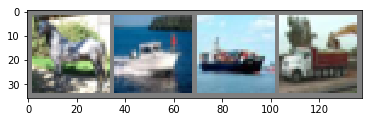

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 写真を表示するメソッド
def imshow(img):
    # Floating point image RGB values must be in the 0..1 range.なのでそれに合わせて計算する
    img = img / 2 + 0.5
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 訓練用データをランダムに取得
dataiter = iter(trainloader)
# それぞれ画像データとラベルデータを格納
images, labels = dataiter.next()

# 写真を表示
# print(torchvision.utils.make_grid(images))
imshow(torchvision.utils.make_grid(images))
# ラベルを表示
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()